<a href="https://colab.research.google.com/github/hitenmewada/EDA-hotel-dataset/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

* studying the average daily rates (adr)
  * monthly adr 
  * adr avg w r t hotel type
  * How does the ADR Vary Over the Year by Hotel Type
  * What is the Effect of Deposit Type on Cancellations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [4]:
pd.set_option ("display.max_columns", 36)

In [5]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [6]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
# sns.distplot(hotel_df['is_canceled']);

In [11]:
# not_canceled_ = pd.DataFrame(hotel_df['arrival_date_year'].value_counts()).reset_index()

In [12]:
# not_canceled_.columns = ['booking year', 'percentage of booking']

In [13]:
# (not_canceled_['percentage of booking'] / not_canceled_['percentage of booking'].sum()) * 100

In [14]:
# hotel_df['days_in_waiting_list'].unique()

In [15]:
# hotel_df['agent'].reset_index()

In [16]:
# hotel_df['lead_time'].unique()

In [17]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [18]:
hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [19]:
# hotel_df['total_of_special_requests'].unique()

In [20]:
# hotel_df['reserved_room_type'].unique()

In [21]:
# hotel_df['reservation_status'].unique()

In [22]:
# hotel_df['distribution_channel'].unique()

In [23]:
# hotel_df['previous_cancellations'].unique()

In [24]:
# hotel_df['previous_bookings_not_canceled'].unique()

In [25]:
# hotel_df['total_of_special_requests'].unique()

In [26]:
# hotel_df['total_of_special_requests'].sum()

In [27]:
# hotel_df['country'].unique()

In [28]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Q-1 what is the Adr average with respect to hotel type ?

In [132]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [166]:
Resort_hotel = hotel_df[(hotel_df['hotel'] == 'Resort Hotel')][['arrival_date_year','arrival_date_month','adr']]

In [167]:
City_hotel = hotel_df[(hotel_df['hotel'] == 'City Hotel')][['arrival_date_year','arrival_date_month','adr']]

In [170]:
Resort_hotel_adr_by_year = Resort_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()
Resort_hotel_adr_by_year

,arrival_date_year,adr
0,2015,89.353417
1,2016,87.730762
2,2017,108.660217


In [171]:
City_hotel_adr_by_year = City_hotel.groupby('arrival_date_year')['adr'].mean().reset_index()
City_hotel_adr_by_year

,arrival_date_year,adr
0,2015,85.856915
1,2016,103.483683
2,2017,117.501864


In [203]:
adr_by_year_hotel_type = pd.concat([Resort_hotel_adr_by_year['arrival_date_year'],Resort_hotel_adr_by_year['adr'],City_hotel_adr_by_year['adr']],axis=1)
adr_by_year_hotel_type.columns = ['Years','Resort Hotel adr by years','City Hotel adr by years']

In [204]:
adr_by_year_hotel_type.set_index('Years',inplace=True)

Text(0.5, 1.0, 'Year ADR by Both Hotel')

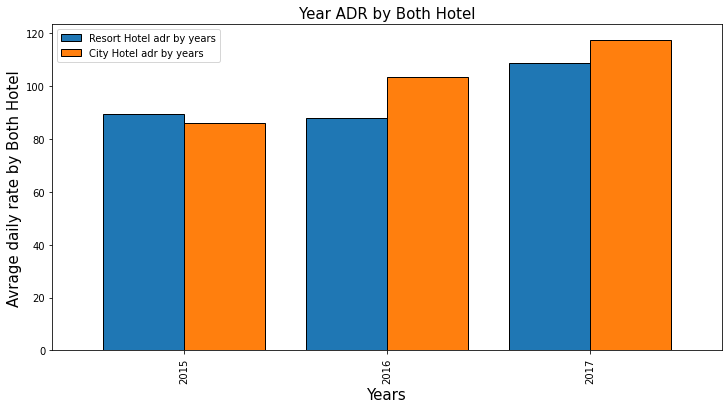

In [201]:
ax=adr_by_year_hotel_type[['Resort Hotel adr by years','City Hotel adr by years']].plot.bar( 
    width=0.8,
    linewidth=1,
    edgecolor='black',
    figsize = (12,6),
    fontsize = 10);
ax.set_xlabel('Years', fontsize = 15)
ax.set_ylabel('Avrage daily rate by Both Hotel', fontsize = 15)
ax.set_title('Year ADR by Both Hotel',fontsize = 15)

Q-2 What is a monthly Average daily rates (adr) ?

In [137]:
hotel_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [138]:
hotel_df['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 119390, dtype: float64

In [139]:
def encoding_months_by_num(str_month):
  month_dict = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
  for i,j in month_dict.items():
    if i == str_month:
      return int(j)

In [140]:
monthly_adr = hotel_df.groupby('arrival_date_month')['adr'].mean().reset_index()

In [141]:
monthly_adr

,arrival_date_month,adr
0,April,100.380790
1,August,140.111523
2,December,81.076776
3,February,73.582276
4,January,70.361241
5,July,126.788013
6,June,116.672192
7,March,80.679646
8,May,108.695516
9,November,73.794962


In [142]:
monthly_adr['month_by_no'] = monthly_adr['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

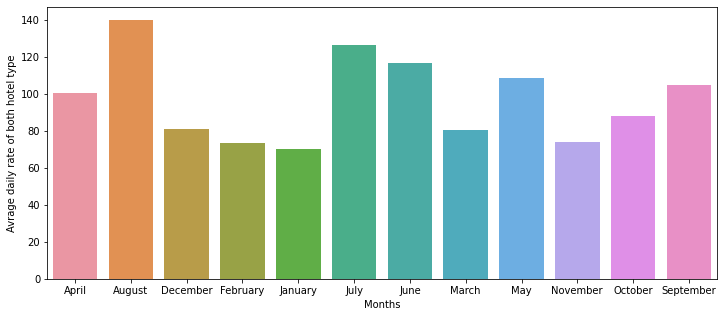

In [143]:
plt.figure(figsize=(12,5))
sns.barplot(x="arrival_date_month",y="adr",data=monthly_adr)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of both hotel type')
plt.show()

Q-3 How does the ADR Vary Over the Year by Hotel Type ?

In [144]:
Resort_hotel_adr_by_month = Resort_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [145]:
Resort_hotel_adr_by_month['month_by_no'] = Resort_hotel_adr_by_month['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [146]:
Resort_hotel_adr_by_month.sort_values(by='month_by_no',inplace=True)

In [147]:
Resort_hotel_adr_by_month

,arrival_date_month,adr,month_by_no
4,January,49.461883,1
3,February,55.171930,2
7,March,57.520147,3
0,April,77.849496,4
8,May,78.758134,5
6,June,110.444749,6
5,July,155.181299,7
1,August,186.790574,8
11,September,93.252030,9
10,October,62.097617,10


In [148]:
City_hotel_adr_by_month = City_hotel.groupby('arrival_date_month')['adr'].mean().reset_index()

In [149]:
City_hotel_adr_by_month['month_by_no'] = City_hotel_adr_by_month['arrival_date_month'].apply(lambda x :encoding_months_by_num(x))

In [150]:
City_hotel_adr_by_month.sort_values(by='month_by_no',inplace=True)

In [151]:
City_hotel_adr_by_month

,arrival_date_month,adr,month_by_no
4,January,82.628986,1
3,February,85.088278,2
7,March,92.643116,3
0,April,111.251838,4
8,May,121.638560,5
6,June,119.074341,6
5,July,110.734292,7
1,August,114.680455,8
11,September,110.004661,9
10,October,99.974498,10


In [152]:
Resort_hotel_adr_by_month['adr'].sum()

1043.7860823252422

In [153]:
City_hotel_adr_by_month['adr'].sum()

1224.6149325405454

In [154]:
adr_by_hotel_type = pd.concat([Resort_hotel_adr_by_month['arrival_date_month'],Resort_hotel_adr_by_month['adr'],City_hotel_adr_by_month['adr']],axis=1)

In [155]:
adr_by_hotel_type.columns = ['Month','Resort Hotel adr','City Hotel adr']

In [156]:
adr_by_hotel_type

,Month,Resort Hotel adr,City Hotel adr
4,January,49.461883,82.628986
3,February,55.171930,85.088278
7,March,57.520147,92.643116
0,April,77.849496,111.251838
8,May,78.758134,121.638560
6,June,110.444749,119.074341
5,July,155.181299,110.734292
1,August,186.790574,114.680455
11,September,93.252030,110.004661
10,October,62.097617,99.974498


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


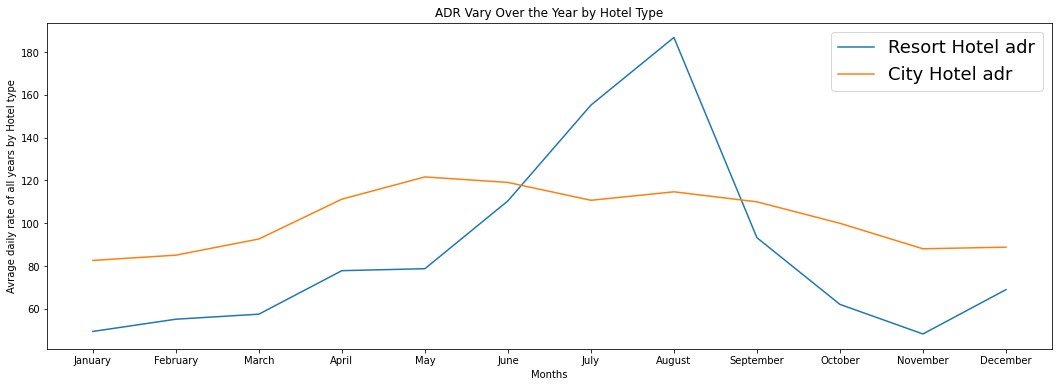

In [165]:
plt.figure(figsize=(18,6))
sns.lineplot(adr_by_hotel_type['Month'],adr_by_hotel_type['Resort Hotel adr'])
sns.lineplot(adr_by_hotel_type['Month'],adr_by_hotel_type['City Hotel adr'])
plt.legend(labels=['Resort Hotel adr','City Hotel adr'], fontsize=18)
plt.xlabel('Months')
plt.ylabel('Avrage daily rate of all years by Hotel type')
plt.title('ADR Vary Over the Year by Hotel Type')
plt.show()